In [1]:
#Create trends for bake-off and Figures for 5-minute presenation

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import importlib as imp
import netCDF4 as nc
import os
import experiments

In [3]:
import matplotlib.colors
lower = plt.cm.RdBu_r(np.linspace(0,.49, 49))
white = plt.cm.RdBu_r(np.ones(2)*0.5)
upper = plt.cm.RdBu_r(np.linspace(0.51, 1, 49))
colors = np.vstack((lower, white, upper))
tmap = matplotlib.colors.LinearSegmentedColormap.from_list('terrain_map_white', colors)

def Plot_Gobal_Map(plot_data, title, levels, colorbar, colorbar_title):
    ax=plt.axes(projection= ccrs.PlateCarree())
    data=plot_data
    data, lonsr = add_cyclic_point(data, coord=lons)
    cs=ax.contourf(lonsr, lats, data,
                transform = ccrs.PlateCarree(),extend='both', cmap = colorbar,
                levels = levels)

    ax.coastlines()
    cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)', format='%.1f')#, pad=5)
    cbar.set_label(colorbar_title)
    plt.title(title)
    
    plt.show()

In [4]:
import preprocessing
imp.reload(preprocessing)
_,Yf,_ = preprocessing.make_data(models=["CESM2"],mems=[1])

/glade/campaign/cgd/cas/asphilli/ForceSMIP/ Omon tos CESM2


In [9]:
lat_n = 72 
lon_n = 144
lats = np.linspace(-90,90,lat_n)
lons = np.linspace(0,360,lon_n)

#tos_exp_1
#test_exp_tos

EXPERIMENT = 'tos_exp_1'
variable = "tos"
time_n = 73 #73 44

if time_n == 44:
    year_range = "1979-2022"
    times = np.arange(0,44,1)
if time_n == 73:
    year_range = "1950-2022"
    times = np.arange(0,73,1)
    
import experiments
imp.reload(experiments)
# data_file = ""
experiment_settings = experiments.get_experiment(EXPERIMENT)

arr_name = 'saved_predictions/' + EXPERIMENT +str(experiment_settings["seed"])+"_preds.npz"
f=np.load(arr_name)
Yf = f["Ptest"]

Yf = Yf[:,:,:,0]

In [10]:
####CALCULATE TREND FOR BAKE-OFF 1950-2022####
linear_FR = np.empty(shape = (72,144))
if time_n == 44:
    for la in np.arange(0, lat_n, 1):
        for lo in np.arange(0, lon_n, 1):
            values = np.polyfit(times, Yf[29:,la,lo], 1)
            linear_FR[la,lo] = values[0] * 44
if time_n == 73:
    for la in np.arange(0, lat_n, 1):
        for lo in np.arange(0, lon_n, 1):
            values = np.polyfit(times, Yf[:,la,lo], 1)
            linear_FR[la,lo] = values[0] * 73


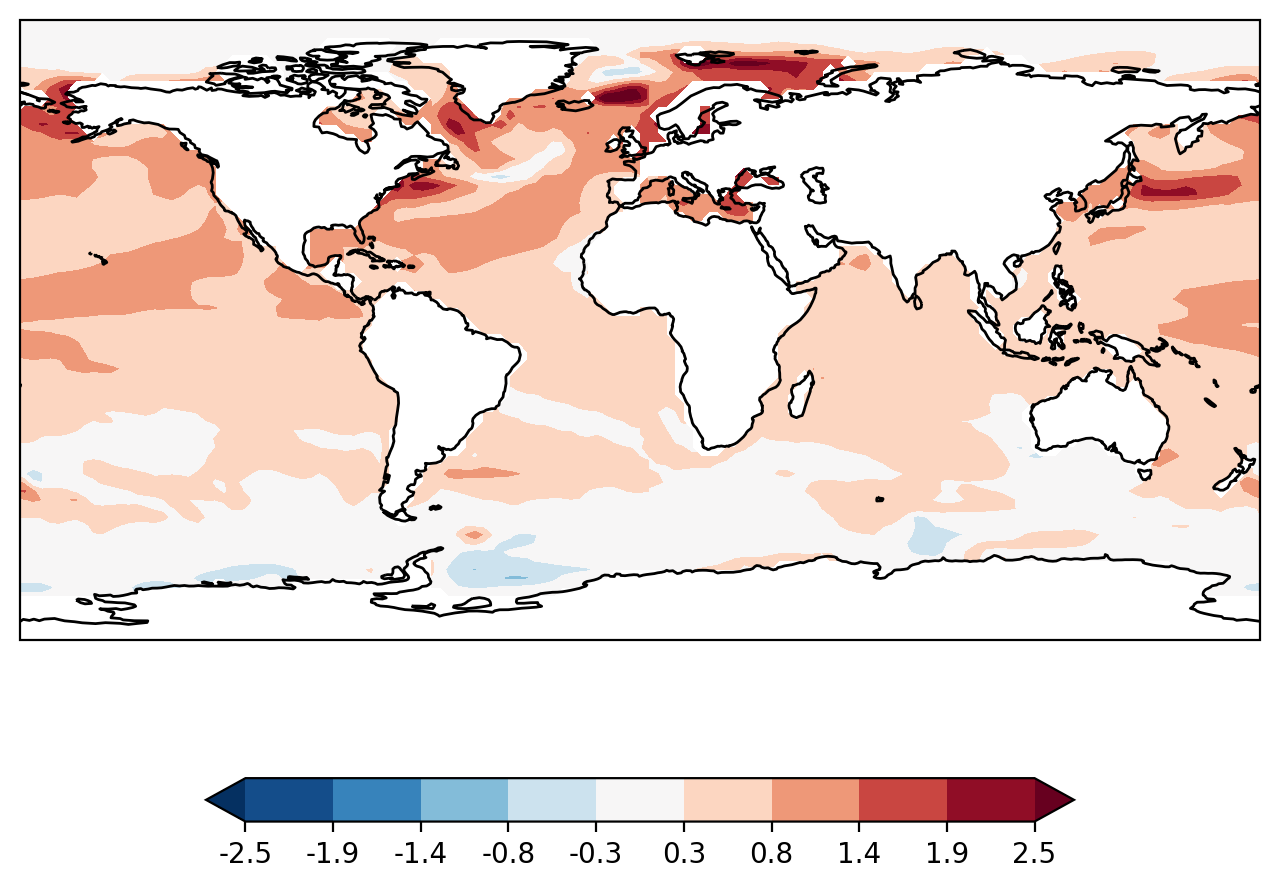

In [17]:
plt.figure(dpi = (200), figsize = (8, 6))
Plot_Gobal_Map(linear_FR, "", np.linspace(-2.5, 2.5, 10), tmap, "")

In [12]:
####SAVES 
SAVE_TREND = True
if SAVE_TREND:
    os.remove("1H."+ str(variable)+ ".VAE.TeamPlanetGlitter." + str(year_range) + ".nc")

    ts = nc.Dataset("1H."+ str(variable)+ ".VAE.TeamPlanetGlitter." + str(year_range) + ".nc", 'w' , format='NETCDF4')
    ts_lat = ts.createDimension('lat',lat_n)
    ts_lon = ts.createDimension('lon',lon_n)

    forced_component = ts.createVariable('forced_component','f4',('lat','lon'))

    forced_component[:,:] = linear_FR

    ts.close()
    print("SAVED " + str(variable) + " " + str(time_n))

import sys
sys.exit(0)

SAVED tos 73


SystemExit: 0

/glade/u/home/pochedls/.conda/envs/forcesmip/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
######################################
##CALCULATE TREND OF EVALUATION DATA##
######################################

data_file = ""
tos_73 = preprocessing.make_eval_mem(evalmem="1H",var="tos",timecut="Tier1")
pr_73 = preprocessing.make_eval_mem(evalmem="1H",var="pr",timecut="Tier1")
tos_44 = tos_73[29:,:,:]
pr_44 = pr_73[29:,:,:]

linear_tos_73 = np.empty(shape = (72,144))
linear_pr_73 = np.empty(shape = (72,144))
linear_tos_44 = np.empty(shape = (72,144))
linear_pr_44 = np.empty(shape = (72,144))

times44 = np.arange(0,44,1)
times73 = np.arange(0,73,1)

for la in np.arange(0, lat_n, 1):
        for lo in np.arange(0, lon_n, 1):
            values = np.polyfit(times73, tos_73[:,la,lo], 1)
            linear_tos_73[la,lo] = values[0] * 73
            
            values = np.polyfit(times73, pr_73[:,la,lo], 1)
            linear_pr_73[la,lo] = values[0] * 73
            
            values = np.polyfit(times44, tos_44[:,la,lo], 1)
            linear_tos_44[la,lo] = values[0] * 44
            
            values = np.polyfit(times44, pr_44[:,la,lo], 1)
            linear_pr_44[la,lo] = values[0] * 44
         

In [ ]:
# plt.figure(dpi = (200), figsize = (6, 6))
# Plot_Gobal_Map(linear_tos_73, "tos 73", np.linspace(-2.5, 2.5, 10), tmap, "C/day/73 years")

# plt.figure(dpi = (200), figsize = (6, 6))
# Plot_Gobal_Map(linear_tos_44, "tos 44", np.linspace(-2.5, 2.5, 10), tmap, "C/day/44 years")

plt.figure(dpi = (200), figsize = (6, 6)) #mm/day
Plot_Gobal_Map(linear_pr_73, "pr 73", np.linspace(-2, 2, 10), tmap, "mm/day/73 years")

# plt.figure(dpi = (200), figsize = (6, 6))
# Plot_Gobal_Map(linear_pr_44, "pr 44", np.linspace(-3, 3, 10), tmap, "mm/day/44 years")


In [ ]:
if variable == "tos":
    if time_n == 73:
        dif = linear_tos_73 - linear_FR
    if time_n == 44:
        dif = linear_tos_44 - linear_FR
        
Plot_Gobal_Map(dif, str(variable) + " " + str(time_n), np.linspace(-.2, .2, 10), tmap, "")

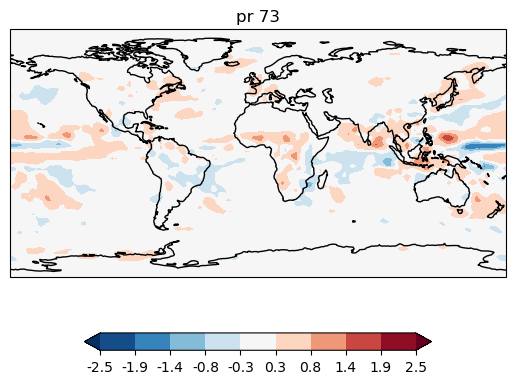

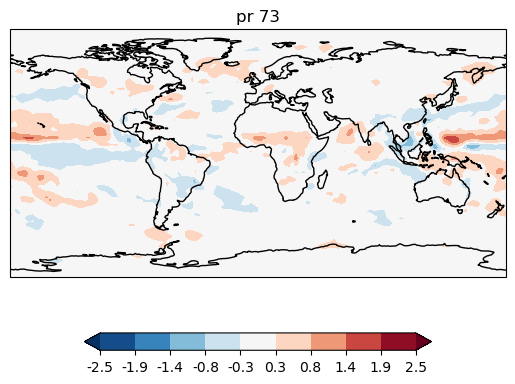

In [15]:
variable = "pr"
year_range = "1979-2022" #"1950-2022" "1979-2022"
f = xr.open_dataset("1H."+ str(variable)+ ".VAE.TeamPlanetGlitter." + str(year_range) + ".nc")
FR = f["forced_component"]

Plot_Gobal_Map(FR, str(variable) + " " + str(time_n), np.linspace(-2.5, 2.5, 10), tmap, "")

variable = "pr"
year_range = "1950-2022" #"1950-2022" "1979-2022"
f = xr.open_dataset("1H."+ str(variable)+ ".VAE.TeamPlanetGlitter." + str(year_range) + ".nc")
FR = f["forced_component"]

Plot_Gobal_Map(FR, str(variable) + " " + str(time_n), np.linspace(-2.5, 2.5, 10), tmap, "")